# Problem 2 GA Dataset B
Bhargav Chandaka and Luke LaLonde

In [29]:
import sys
sys.path.append('../')
from common.GeneticAlgorithm import GeneticAlgorithm
import numpy as np
import math

my_data = np.load('B.npz')
bag_capacity = int(my_data['capacity'])
n_items = int(my_data['n_items'])
item_values = my_data['item_values']
item_weights = my_data['item_weights']
print(bag_capacity)
def fitness_func(total_pop):
    fitness = total_pop @ item_values
    return -fitness
def calc_weights(pop):
    return pop @ item_weights
def environmental_constraint(pop):
    weights = calc_weights(pop)
    idx = (weights <= bag_capacity)
    return pop[idx]

149


# Experiment 1: Higher Mutation Delta
Mutation Range = (-1,1), 
Random Uniformly chosen from range, and then rounded to mutate 50% of offspring 

In [30]:
PARAM_SIZE = n_items
POP_SIZE = 100
LOW_BOUND = 0
HIGH_BOUND = 1
NUM_GENERATIONS = 4000
genetic_alg = GeneticAlgorithm(
    PARAM_SIZE, 
    POP_SIZE, 
    LOW_BOUND, 
    HIGH_BOUND, 
    fitness_func,
    environmental_constraint,
    discrete = True
)
# genetic_alg.crossover_idx = 0
genetic_alg.mutation_center = 0
genetic_alg.mutation_delta = 1
genetic_alg.initial_high_bound = 0.51
genetic_alg.run(NUM_GENERATIONS)

Generation : 0
Best result in current iteration -39.0 compared to overall -39.0
Generation : 1
Best result in current iteration -148.0 compared to overall -148.0
Generation : 2
Best result in current iteration -259.0 compared to overall -259.0
Generation : 3
Best result in current iteration -268.0 compared to overall -268.0
Generation : 4
Best result in current iteration -268.0 compared to overall -268.0
Generation : 5
Best result in current iteration -276.0 compared to overall -276.0
Generation : 6
Best result in current iteration -276.0 compared to overall -276.0
Generation : 7
Best result in current iteration -279.0 compared to overall -279.0
Generation : 8
Best result in current iteration -279.0 compared to overall -279.0
Generation : 9
Best result in current iteration -279.0 compared to overall -279.0
Generation : 10
Best result in current iteration -279.0 compared to overall -279.0
Generation : 11
Best result in current iteration -285.0 compared to overall -285.0
Generation : 12


## Results Analysis:
Higher weight constraint, so less offspring are mutated outside the bounds than with data A

In [31]:
print(genetic_alg.best_solution)
print(calc_weights(genetic_alg.best_solution))
print(fitness_func(genetic_alg.best_solution))

[1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1.]
149.0
-319.0


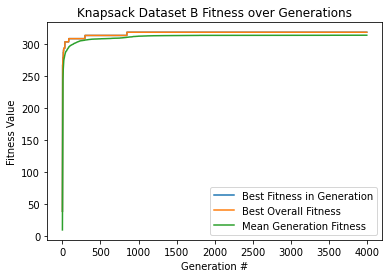

In [32]:
genetic_alg.plot_knapsack("Knapsack Dataset B")

# Experiment 2: lower mutation delta

In [33]:
PARAM_SIZE = n_items
POP_SIZE = 100
LOW_BOUND = 0
HIGH_BOUND = 1
NUM_GENERATIONS = 4000
genetic_alg2 = GeneticAlgorithm(
    PARAM_SIZE, 
    POP_SIZE, 
    LOW_BOUND, 
    HIGH_BOUND, 
    fitness_func,
    environmental_constraint,
    discrete = True
)
# genetic_alg.crossover_idx = 0
genetic_alg2.mutation_center = 0
genetic_alg2.mutation_delta = 0.55 # kind of like learning rate
genetic_alg2.initial_high_bound = 0.51
genetic_alg2.run(NUM_GENERATIONS)

Generation : 0
Best result in current iteration -48.0 compared to overall -48.0
Generation : 1
Best result in current iteration -81.0 compared to overall -81.0
Generation : 2
Best result in current iteration -81.0 compared to overall -81.0
Generation : 3
Best result in current iteration -113.0 compared to overall -113.0
Generation : 4
Best result in current iteration -133.0 compared to overall -133.0
Generation : 5
Best result in current iteration -147.0 compared to overall -147.0
Generation : 6
Best result in current iteration -154.0 compared to overall -154.0
Generation : 7
Best result in current iteration -206.0 compared to overall -206.0
Generation : 8
Best result in current iteration -225.0 compared to overall -225.0
Generation : 9
Best result in current iteration -225.0 compared to overall -225.0
Generation : 10
Best result in current iteration -231.0 compared to overall -231.0
Generation : 11
Best result in current iteration -246.0 compared to overall -246.0
Generation : 12
Best

## Results Analysis
Higher and more consistent convergence than before of around 650+

In [34]:
print(genetic_alg2.best_solution)
print(calc_weights(genetic_alg2.best_solution))
print(fitness_func(genetic_alg2.best_solution))

[0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 1.]
149.0
-309.0


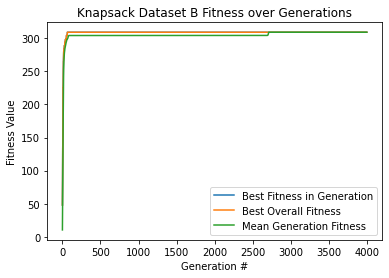

In [35]:
genetic_alg2.plot_knapsack("Knapsack Dataset B")